# Running MPSE using Stochastic Gradient Descent Schemes

In [1]:
import sys; sys.path.insert(0,"../")
import mview

In all of these experiments, the dissimilarity relations used will be those of 1028 nodes, with random positions in 3D space, observed from 3 different perspectives, each given by projection of the 3D positions into 2D positions by a random orthogonal projection matrix.

In [2]:
DD = {
    'nodes' : 500,#1028,
    'attributes' : 3,
} #this dictionary defines the dissimilarity relations

We first run MPSE with fixed projections. We set the projection parameters to be the standard projections. MPSE will know to use these in defining the dissimilarity relations.

The level of stochasticity is given by average_neighbors, which is the average number of neighbors per node used in computing the stress and gradient at each iteration.

The color in the plots was added automatically (by order of the 1st components in each of the true projection images). The more 'organized' the color, the better the embedding.

In [ ]:
_ = mview.MPSE(DD,Q='standard',average_neighbors=3,verbose=0,plot=True)

mpse.MPSE():
  mds.MDS(perspective # 1):
    dissimilarity stats:
      number of points : 500
      number of edges : 124750
      dissimilarity rms : 8.81e-01
      normalization factor : 1.10e+05
    embedding stats:
      dimension : 2
  mds.MDS(perspective # 2):
    dissimilarity stats:
      number of points : 500
      number of edges : 124750
      dissimilarity rms : 8.74e-01
      normalization factor : 1.09e+05
    embedding stats:
      dimension : 2
  mds.MDS(perspective # 3):
    dissimilarity stats:
      number of points : 500
      number of edges : 124750
      dissimilarity rms : 8.95e-01
      normalization factor : 1.12e+05
    embedding stats:
      dimension : 2
  MPSE.initialize():
    X0 : random
    Q0 : random
  dissimilarity stats:
    number of views : 3
    number of points : 500
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.gd():
    mpse method : optimize all
    initial stress : 8.12e-01
gd.multiple(): 
  computation

0.0008575581904254837 1.45e-04, grad = 6.47e-03, cost = 2.68e-04, lr = 3.45e-01
0.0006160011216649241
0.0008028888747747979 1.34e-04, grad = 6.03e-03, cost = 2.51e-04, lr = 3.38e-01
0.0005690996155939473
0.0007072222452133622 1.22e-04, grad = 5.45e-03, cost = 2.31e-04, lr = 3.38e-01
0.0005156419981418251
0.0006774878866514058 1.13e-04, grad = 4.97e-03, cost = 2.14e-04, lr = 3.46e-01
0.0004813911927443845
0.0006653867780035001 1.15e-04, grad = 4.87e-03, cost = 2.03e-04, lr = 3.61e-01
0.0004866638606500516
0.0005932763887972104 9.92e-05, grad = 4.42e-03, cost = 1.87e-04, lr = 3.44e-01
0.00042072577673467587
0.0005665771244897563 9.14e-05, grad = 3.99e-03, cost = 1.71e-04, lr = 3.55e-01
0.0003878087572008838
0.0005216067851229982 8.70e-05, grad = 3.75e-03, cost = 1.61e-04, lr = 3.62e-01
0.00036928300281733066
0.0005023933723201253 8.25e-05, grad = 3.49e-03, cost = 1.49e-04, lr = 3.70e-01
0.0003501127253540383
0.0004523378700379356 7.74e-05, grad = 3.28e-03, cost = 1.39e-04, lr = 3.61e-01


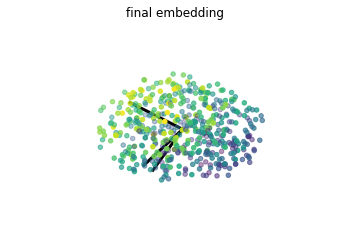

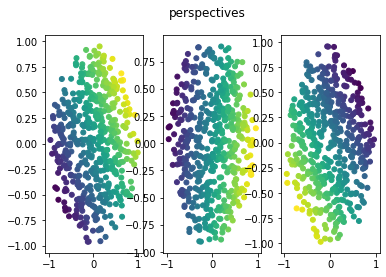

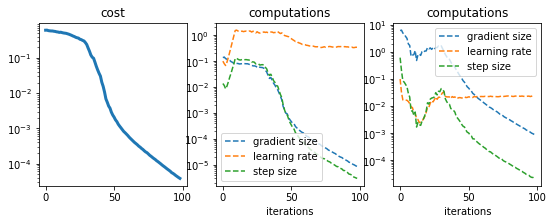

In [6]:
_ = mview.MPSE(DD,average_neighbors=16,verbose=2,plot=True,lr=.1)